## 05.

### Poisson equation
* Fixed-source case
  $$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=-\rho(x)$$
  - The net charge density, $\rho(x)$, is given by
  $$\rho(x)=qp(x)-qn(x)+qN_{dop}^+(x) $$
  $p(x)$: Hole density, $n(x)$: Electron density, $N_{dop}^+(x)$: Net doping density
  - Calculating $p(x)$ and $n(x)$ is not a trivial task.
  - Assume that <span style="color:red"><U>all mobile carriers are depleted</U></span>. (To be relaxed later)
  $$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=-qN_{dop}^+(x)$$
### Double-gate MOS
* Real engineering problem
  - A silicon layer(whose thickness is $t_si$) surrounded by two oxide layers(whose thickness is $t_ox$)
  - The silicon layer is doped with p-type dopants. The doping density is $N_{acc}$. Since the p-type dopant provides a hole, the dopant itself is negatively charged. $N_{dop}^+=-N_{acc}$
  - Boundary condition $\phi(0)=\phi(a)=0$
### Analytic solution(1)
* Qualitative analysis
  - Due to the mirror symmetry, the electrostatic potential is also mirror symmetric.
  - Inside the oxide layer, the electrostatic potential must be linear.
  - Inside the silicon layer, the Poisson equation reads $(N_{acc}>0)$
   $$\frac{d}{dx}\left[\frac{d}{dx}\phi(x) \right]=\frac{qN_{acc}}{\epsilon_{si}}$$
### Analytic solution(2)
* Solution
  - Integrating the Poisson equation inside the silicon layer,
    $$\left.\frac{d\phi}{dx}\right|_{x=t_{ox}+t_{si}}-\left.\frac{d\phi}{dx}\right|_{x=t_{ox}}=\frac{qN_{acc}}{\epsilon_{si}}t_{si} $$
  - the first order shown at boundary. silion region above. using continuty of D vector at silicon-oxide bounary
    $$\left.\epsilon_{si}\frac{d\phi}{dx} \right|_{x=t_{ox}}=\epsilon_{ox}\frac{\phi(t_{ox})-d(0)}{t_{ox}}$$
  - apply boundary condition $x=t_{ox}$
    $$\left.\frac{d\phi}{dx} \right|_{x=t_{ox}}=\frac{\epsilon_{ox}}{\epsilon_{si}}\frac{\phi(t_{ox})}{t_{ox}}=\frac{\phi(t_{ox})}{3t_{ox}} $$
  - apply boundary condition $x=t_{ox}+t_{si}$
    $$\left.\epsilon_{si}\frac{d\phi}{dx} \right|_{x=t_{ox}+t_{si}}=-\frac{\phi(t_{ox}+t_{si})}{3t_{ox}}=-\frac{\phi(t_{ox})}{3t_{ox}} $$
  - The electrostatic potential at $x=t_{ox}$ is given by
    $$\phi(t_{ox})=-\frac{3t_{ox}qN_{acc}t_{si}}{2\epsilon_{si}} $$
### Scaling
* A suitable form
  - The original form
    $$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=qN_{acc}(x)$$
    $$\epsilon(x_{i+0.5})\frac{\phi_{i+1}-\phi_i}{\Delta x} - \epsilon(x_{i-0.5})\frac{\phi_i-\phi_{i-1}}{\Delta x} = (\Delta x)qN_{acc}$$
  - However, the values of $\epsilon(x)$ and $dx$ in the SI unit is very small.
  - Equivalently, we will use the following form:
    $$(\Delta x)\frac{d}{dx}\left[\frac{\epsilon(x)}{\epsilon_0}\frac{d}{dx}\phi(x) \right]=(\Delta x)\frac{qN_{acc}(x)}{\epsilon_0} $$
  - The discretized version at x=x_i is
    $$\frac{\epsilon(x_{i+0.5})}{\epsilon_0}\phi_{i+1} - \frac{\epsilon(x_{i+0.5})+\epsilon(x_{i-0.5})}{\epsilon_0}\phi_i + \frac{\epsilon(x_{i-0.5})}{\epsilon_0}\phi_{i-1} = (\Delta x)^2\frac{qN_{acc}(x_i)}{\epsilon_0}$$
### Python
* Step-by-step procedure
  - First, set up the structure
  - Next, set the matrix, A.(Five cases)
  - The vector, b, contains the doping effect.
### 0V? What does it mean?
* Electrostatic potential, $\phi(r)$
  - Let us assume that it is 0V at a certain point. Then, what is its meaning?
  - Misconception, that point has the same electrostatic potential with the ground.
  - We have to realize that the applied voltages at contacts are ***<U>NOT</U>*** the electrostatic potential.
* What's the matter with $\phi(r)$?
  - In the computational electronics, it is very important to understand the meaning of $\phi(r)$ exactly.
### Ambiguity
* Global shift of the potential
  - Since the electric field is given by $E(r)=-\Delta \phi(r)$, a global shift of the potential does not introduce different physics.
* We must anser two questions:
  - Which quality is described by the electrostatic potential?
    (Especially, in the semiconductor device simulator)
  - What is the reference of the electrostatic potential?
### Widely adopted convention
* Answer #1
  - By the electrostatic potential, we want to point out the intrinsic Fermi level of the reference material.
  - For example, when the reference material is silicon,
    $$E_i(r)=-q\phi(r) $$
    $E_i(r)$: Intrinsic Fermi level of silicon in this example.
* Answer #2
  - The reference energy is the Fermin level at equilibrium.
  - Therefore, the Fermin potential at equilibrium is 0V.
### Problem
* Repeat our example. The oxide thickness is 0.8nm. The channel thickness is 5nm
* Consider three different values of $N_{acc}$, 10^17 cm-3, 10^18cm^-3, 10^19cm^-3
* Compare your numerical results with the analytic solutions.

### Numerical
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx}\phi(x) \right]=b(x)$$
$$\epsilon(x)=
\begin{cases}
\epsilon_1, & 0 \le x < t1 \\
\epsilon_2, & t1 \le x < t1+t2 \\
\epsilon_1, & t1+t2 \le x < a
\end{cases}
$$
$$b(x)=
\begin{cases}
0, & 0 \le x < t1 \\
qN_{acc}, & t1 \le x < t1+t2 \\
0, & t1+t2 \le x < a
\end{cases}
$$
$$\phi(0)=\phi(a)=0 $$
* By the finite difference
$$\frac{d}{dx}\left[\epsilon(x)\frac{d}{dx} \right] \rightarrow A$$

$$b(x)=(\Delta x)^2
\begin{bmatrix}
0 \\ \cdots \\ \frac{qN_{acc}}{2\epsilon_0} \\ \frac{qN_{acc}}{\epsilon_0} \\ \cdots \\ \frac{qN_{acc}}{\epsilon_0} \\ \frac{qN_{acc}}{2\epsilon_0} \\ \cdots \\ 0
\end{bmatrix}
$$

$$\phi(x)
\begin{bmatrix}
\phi_1 \\ \cdots \\ \phi_N
\end{bmatrix}
$$

### Analytic solution
#### New1
tox=0.8e-9 N(t1)=8, tsi=5e-9 N(t2)=50, N(t1)=8, N(a)=2*8+50=66  
$t_1=\frac{8}{66}a, t_2=\frac{50}{66}a $
$$\phi(x)=
\begin{cases}
-\frac{qN_{acc}}{2\epsilon_{ox}}t_2 x &, 0 \le x < t1 \\
\frac{qN_{acc}}{2\epsilon_{si}}(x-t_1-\frac{t_2}{2})^2-\frac{qN_{acc}}{2}\left(\frac{t_1 t_2}{\epsilon_{ox}}+\frac{1}{\epsilon_{si}}\left(\frac{t_2}{2} \right)^2 \right) &, t1 \le x < t1+t2 \\
\frac{qN_{acc}}{2\epsilon_{ox}}t_2(x-a) &, t1+t2 \le x < a
\end{cases}
$$
#### New2
* Analytic solution of potential should be obtained to compare with numerical solution
  $$\phi(t_{ox})=-\frac{3t_{ox}qN_{acc}t_{si}}{2\epsilon_{si}} \quad at\ interface$$
  $$\phi(x)=\frac{\phi(\epsilon_{ox}}{t_{ox}}x \quad at\ oxide1 $$
  $$\phi(x)=\frac{qN_{acc}}{2\epsilon_{si}}(x-t_{ox})(x-t_{ox}-t_{si})+\phi(t_{ox}) \quad at\ interface2 $$
  $$\phi(x)=-\frac{\phi(\epsilon_{ox}}{t_{ox}}(x-2t_{ox}-t_{si}) \quad at\ oxide2 $$

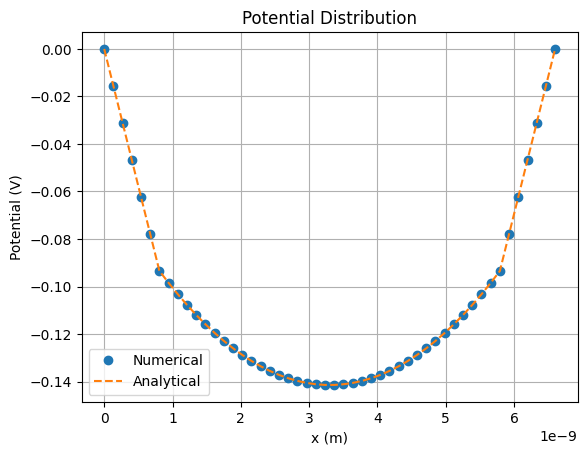

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#### Variable ####
t1 = 0.8e-9  # Oxide thickness, m
t2 = 5e-9  # Silicon thickness, m
N = 50
Na = 1e19*1e6 # Doping concentration, 1/m^3

# Constants
q = 1.602e-19  # Elementary charge, C
a = 2*t1+t2
dx = a / (N - 1)  # delta x, m
interface1 = round(t1 / dx)
interface2 = round((t1 + t2) / dx)
e1 = 3.9   # Relative permittivity of oxide
e2 = 11.7  # Relative permittivity of silicon
e0 = 8.854e-12  # Vacuum permittivity, F/m

def build_matrix(N, interface1, interface2, e1, e2, Na):
    A = np.zeros((N, N))
    b = np.zeros(N)

    for ii in range(N):
        if ii == 0 or ii == N - 1:
            A[ii, ii] = 1
            b[ii] = 0
        elif ii < interface1 or ii > interface2:
            A[ii, ii - 1] = e1; A[ii, ii] = -2 * e1; A[ii, ii + 1] = e1
            b[ii] = 0
        elif interface1 < ii < interface2:
            A[ii, ii - 1] = e2; A[ii, ii] = -2 * e2; A[ii, ii + 1] = e2
            b[ii] = dx * dx * q / e0 * Na
        elif ii == interface1:
            A[ii, ii - 1] = e1; A[ii, ii] = -e1 - e2; A[ii, ii + 1] = e2
            b[ii] = dx * dx * q / e0 * Na / 2
        elif ii == interface2:
            A[ii, ii - 1] = e2; A[ii, ii] = -e2 - e1; A[ii, ii + 1] = e1
            b[ii] = dx * dx * q / e0 * Na / 2

    return A, b

#### Numerical ####
A, b = build_matrix(N, interface1, interface2, e1, e2, Na)
phi = np.linalg.solve(A, b)
x = np.linspace(0, a, N)

#### Analytical ####
def exact(x):
    if x < 8./66.*a:
        return -q*Na/(2.*e1)*50./66.*a*x
    elif x < 58./66.*a:
        return q*Na/(2.*e2)*(x-33./66.*a)**2-q*Na/2.*(50./66.*8./66./e1+(25./66.)**2/e2)*a**2
    else:
        return q*Na/(2.*e1)*50./66.*a*(x-a)

def get_exact(x):
    return np.vectorize(exact)(x)

# Plot numerical solution
plt.plot(x, phi, "o", label='Numerical')
plt.plot(x, -np.abs(get_exact(x)-phi), "--", label='Analytical')
plt.xlabel('x (m)'), plt.ylabel('Potential (V)'), plt.title('Potential Distribution')
plt.legend(), plt.grid(True)
plt.show()



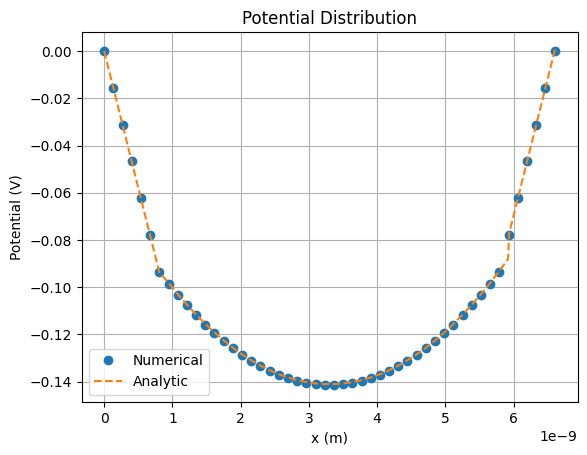

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
q = 1.602e-19  # Elementary charge, C
width = 5e-9  # Silicon thickness, m
tox = 0.8e-9  # Oxide thickness, m
N = 50
dx = (width + 2 * tox) / (N - 1)  # delta x, m
interface1 = round(tox / dx)
interface2 = round((tox + width) / dx)
Na = 1e25  # Doping concentration, 1/m^3
e_si = 11.7  # Relative permittivity of silicon
e_ox = 3.9   # Relative permittivity of oxide
e0 = 8.854e-12  # Vacuum permittivity, F/m

A = np.zeros((N, N))
b = np.zeros(N)
coeff = dx * dx * q / e0

# Fill matrix A and vector b
for ii in range(N):
    if ii == 0 or ii == N - 1:
        A[ii, ii] = 1
        b[ii] = 0
    elif interface1 < ii < interface2:
        A[ii, ii - 1] = e_si
        A[ii, ii] = -2 * e_si
        A[ii, ii + 1] = e_si
        b[ii] = coeff * Na
    elif ii < interface1 or ii > interface2:
        A[ii, ii - 1] = e_ox
        A[ii, ii] = -2 * e_ox
        A[ii, ii + 1] = e_ox
        b[ii] = 0
    elif ii == interface1:
        A[ii, ii - 1] = e_ox
        A[ii, ii] = -e_ox - e_si
        A[ii, ii + 1] = e_si
        b[ii] = coeff * Na / 2
    elif ii == interface2:
        A[ii, ii - 1] = e_si
        A[ii, ii] = -e_ox - e_si
        A[ii, ii + 1] = e_ox
        b[ii] = coeff * Na / 2

# Solve for potential
phi = np.linalg.solve(A, b)

# Position array
x = np.linspace(0, width + 2 * tox, N)

# Plot numerical solution
plt.plot(x, phi, "o", linewidth=1.5, label='Numerical')

# Analytic solution
phi_interface = -3 * tox * q * Na * width / (2 * e_si * e0)

x0 = np.arange(0, tox + dx, dx)
x1 = np.arange(tox + dx, tox + width + dx, dx)
x2 = np.arange(tox + width + dx, 2 * tox + width + dx, dx)

phi0 = phi_interface * x0 / tox
phi1 = (q * Na * (x1 - tox) * (x1 - tox - width)) / (2 * e0 * e_si) + phi_interface
phi2 = -phi_interface * (x2 - 2 * tox - width) / tox
phi_analytic = np.concatenate([phi0, phi1, phi2])

x_analytic = np.concatenate([x0, x1, x2])

plt.plot(x_analytic, phi_analytic, '--', label='Analytic')
plt.xlabel('x (m)')
plt.ylabel('Potential (V)')
plt.legend()
plt.grid(True)
plt.title('Potential Distribution')
plt.show()
